# (Shortened Sample)

# Fall 2024 INFO 1998 Final Project : Age and Gender Prediction Model


## Jane Tenecota Villa & Karen Yao

__Introduction__

In our project, we attempt to investigate what are the most significant features among health and lifestyle factors that can contribute to predicting human age. Through machine learning models and techniques, we hope to gain insight on how age is correlated with these features.

__Source__

The dataset can be found here: https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset/data

This dataset contains synthetic data designed for predicting age based on various health and lifestyle factors. It includes 3,000 rows with 24 features, each representing different aspects of physical health and lifestyle.

__Feautures__

The features and their attributes are described as follows:

- Age :
_The target variable representing the age (in years) of the individual_

- Height(cm) :
_The height of the individual in centimeters._

- Weight(kg) :
_The weight of the individual in kilograms_

- Blood Pressure (s/d) :
_Blood pressure (systolic/diastolic) in mmHg_

- Cholesterol Level (mg/dL) :
_Cholesterol level in milligrams per deciliter_

- BMI :
_Body Mass Index, calculated from height and weight_

- Blood Glucose Level (mg/dL) :
_Blood glucose level in milligrams per deciliter_

- Bone Density (g/cm²) :
_Bone density in grams per square centimeter_

- Vision Sharpness :
_Vision sharpness on a scale from 0 (blurry) to 1 (perfect)_

- Hearing Ability :
_Hearing ability in decibels (Normal hearing ability: 0 to 20 db, anything higher equates to some hearing loss)_

- Physical Activity Level :
_Categorized as 'Low', 'Moderate', or 'High'_

- Smoking Status :
_Categorized as 'Never', 'Former', and 'Current'._

- Diet :
_Type of diet, categorized as 'Balanced', 'High Protein', 'Low Carb', etc._

- Medication Use :
_Usage of medication_

- Family History :
_Presence of family history of age-related conditions_

- Cognitive Function :
_Self-reported cognitive function on a scale from 0 (poor) to 100 (excellent)_

- Mental Health Status :
_Self-reported mental health status_

- Sleep Patterns :
_Labeled as insomnia, normal and excessive_

- Stress Levels :
_Self-reported stress levels on a scale from 0 (low) to 10 (high)_

- Pollution Exposure :
_Exposure to pollution on a scale from 0 (low) to 10 (high)_

- Education Level :
_Highest level of education attained_

- Sun Exposure :
_Average sun exposure in hours per week_

- Income Level :
_Annual income in USD_

In [2]:
#Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Loading and looking at data and it's contents
old_df = pd.read_csv('Entire Dataset.csv')
old_df.head(10)

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cmÂ²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79
5,Male,174.891617,79.671483,134/75,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,...,Diabetes,71.339373,Fair,Insomnia,3.138738,7.282163,4.413398,Undergraduate,Medium,29
6,Male,178.586966,86.521864,178/109,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,...,Diabetes,48.053091,Good,Insomnia,8.355000,5.552008,6.355807,High School,Low,76
7,Female,168.002914,66.524209,144/79,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,...,NaN,83.226875,Good,Excessive,2.583327,0.180754,5.926725,NaN,Medium,26
8,Female,164.546917,74.405356,152/119,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,...,Diabetes,64.702746,Fair,Insomnia,1.392434,9.945505,5.639334,High School,High,50
9,Female,164.839426,64.271711,153/109,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,...,Hypertension,57.824789,Poor,Excessive,7.273142,7.024841,4.313894,High School,High,77


In [58]:
#Looking at the range of age values
min_age = old_df['Age'].min()
max_age = old_df['Age'].max()
print('Min age in dataset: '+ str(min_age))
print('Max age in dataset: '+ str(max_age))

Min age in dataset: 18
Max age in dataset: 89


### Data Cleaning

As of right now our dataset includes a mix of null values, categorical values, and a unique value type for blood pressure. We'll focus on converting all of our data into numerical for easier interpretation and usability.

In [60]:
#Dropping the features that have at least 33.33% null values (in other words have >= 1000 null values)
#Also deleted blood pressure since it would require extensive further reasearch on how to interpret the value

old_df = old_df.drop(['Blood Pressure (s/d)', 'Family History', 'Medication Use', 'Chronic Diseases', 'Alcohol Consumption'], axis = 1)
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Cholesterol Level (mg/dL)    3000 non-null   float64
 4   BMI                          3000 non-null   float64
 5   Blood Glucose Level (mg/dL)  3000 non-null   float64
 6   Bone Density (g/cmÂ²)        3000 non-null   float64
 7   Vision Sharpness             3000 non-null   float64
 8   Hearing Ability (dB)         3000 non-null   float64
 9   Physical Activity Level      3000 non-null   object 
 10  Smoking Status               3000 non-null   object 
 11  Diet                         3000 non-null   object 
 12  Cognitive Function           3000 non-null   float64
 13  Mental Health Stat

In [62]:
#From the information displayed above, one could see that that the education level column has null values
#We'll perform data impuation, replacing the null values with the mode of the column
mode = old_df['Education Level'].mode()
print('Education Level Mode : ' + str(mode))
df = old_df.fillna('Undergraduate')
df.info()

Education Level Mode : 0    Undergraduate
Name: Education Level, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Cholesterol Level (mg/dL)    3000 non-null   float64
 4   BMI                          3000 non-null   float64
 5   Blood Glucose Level (mg/dL)  3000 non-null   float64
 6   Bone Density (g/cmÂ²)        3000 non-null   float64
 7   Vision Sharpness             3000 non-null   float64
 8   Hearing Ability (dB)         3000 non-null   float64
 9   Physical Activity Level      3000 non-null   object 
 10  Smoking Status               3000 non-null   object 
 11  Diet                         3000 non-null   object 
 1

In [18]:
#Looking at specifically at the object types (aka our categorical data) & the unique elements in each
print('Gender categories: ', df.Gender.unique())
print('Mental Health Status categories: ', df['Mental Health Status'].unique())
print('Physical Activity Level categories: ', df['Physical Activity Level'].unique())
print('Income Level categories: ', df['Income Level'].unique())
print('Sleep Patterns categories: ', df['Sleep Patterns'].unique())
print('Education Level categories: ', df['Education Level'].unique())
print('Diet categories: ', df.Diet.unique())
print('Smoking Status categories: ', df['Smoking Status'].unique())

Gender categories:  ['Male' 'Female']
Mental Health Status categories:  ['Good' 'Poor' 'Fair' 'Excellent']
Physical Activity Level categories:  ['Moderate' 'Low' 'High']
Income Level categories:  ['Medium' 'Low' 'High']
Sleep Patterns categories:  ['Insomnia' 'Normal' 'Excessive']
Education Level categories:  ['Undergraduate' 'High School' 'Postgraduate']
Diet categories:  ['Low-carb' 'Balanced' 'Vegetarian' 'High-fat']
Smoking Status categories:  ['Former' 'Current' 'Never']


In [39]:
pd.set_option('future.no_silent_downcasting', True)

#Turning categoral data to numerical
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df['Mental Health Status'].replace({'Poor':1, 'Fair':2, 'Good':3, 'Excellent':4},inplace=True)
df['Physical Activity Level'].replace({'Low':1, 'Moderate':2, 'High':3}, inplace=True)
df['Income Level'].replace({'Low':1, 'Medium':2, 'High':3}, inplace = True)
df['Sleep Patterns'].replace({'Insomnia':1, 'Normal':2, 'Excessive':3}, inplace = True)
df['Education Level'].replace({'High School':1, 'Undergraduate':2, 'Postgraduate':3}, inplace = True)
df['Diet'].replace({'Low-carb':1, 'Balanced':2, 'Vegetarian':3, 'High-fat':4}, inplace = True)
df['Smoking Status'].replace({'Never':0, 'Former':1, 'Current':3}, inplace = True)


df.head(10)

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cmÂ²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Diet,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age
0,1,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,2,...,1,44.059172,3,1,2.797064,5.142344,7.108975,2,2,89
1,1,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,1,...,2,45.312298,3,2,9.339930,7.272720,3.918489,2,2,77
2,0,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,2,...,2,56.246991,1,1,9.234637,8.500386,5.393408,2,2,70
3,0,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,2,...,2,55.196092,1,1,4.693446,7.555511,2.745578,2,1,52
4,0,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,1,...,3,53.023379,3,2,4.038537,9.429097,3.878435,2,3,79
5,1,174.891617,79.671483,198.718529,26.047432,100.928108,1.435352,0.666739,27.908177,1,...,2,71.339373,2,1,3.138738,7.282163,4.413398,2,2,29
6,1,178.586966,86.521864,246.339736,27.128536,129.977078,0.577363,0.200000,63.363360,2,...,2,48.053091,3,1,8.355000,5.552008,6.355807,1,1,76
7,0,168.002914,66.524209,222.462440,23.569268,116.806072,1.618100,0.717328,39.530483,2,...,3,83.226875,3,3,2.583327,0.180754,5.926725,2,2,26
8,0,164.546917,74.405356,204.235608,27.480504,137.022297,1.047384,0.505928,54.105122,2,...,1,64.702746,2,1,1.392434,9.945505,5.639334,1,3,50
9,0,164.839426,64.271711,268.598653,23.653623,130.056457,0.321093,0.200000,65.601092,2,...,4,57.824789,1,3,7.273142,7.024841,4.313894,1,3,77


### Data Visualization

We'll know use graphs to see how a feature is associated with our target, age. We'll look for what features are dominant and how they might affect a person's age. 

With an overwhelming amount of data, it will take a lot of time and effort to go through each feature and see how it affects age. We'll use a correlation matrix to find our varirables of interest, using the top 3 scores and then proceeding with individual scatterplots for each.

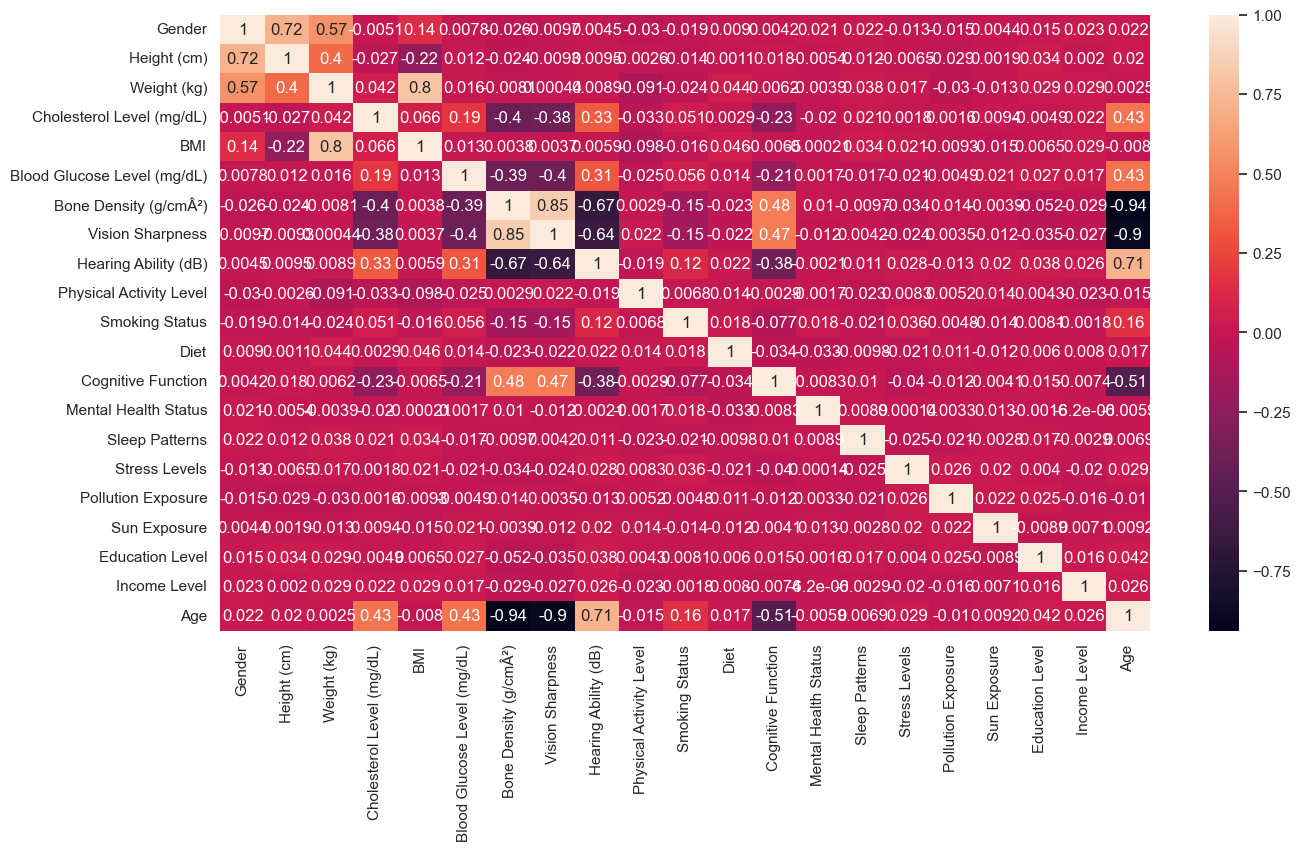

In [24]:
#correlation matrix
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)
plt.show()

From the heatmap above, one can see that the most correlated with age is Bone Density (g/cmÂ²), Vision Sharpness, and Hearing Ability (dB). These will be the features that will be used to train our model and for creating our machine learning model rather than using the whole entirety of the dataset.

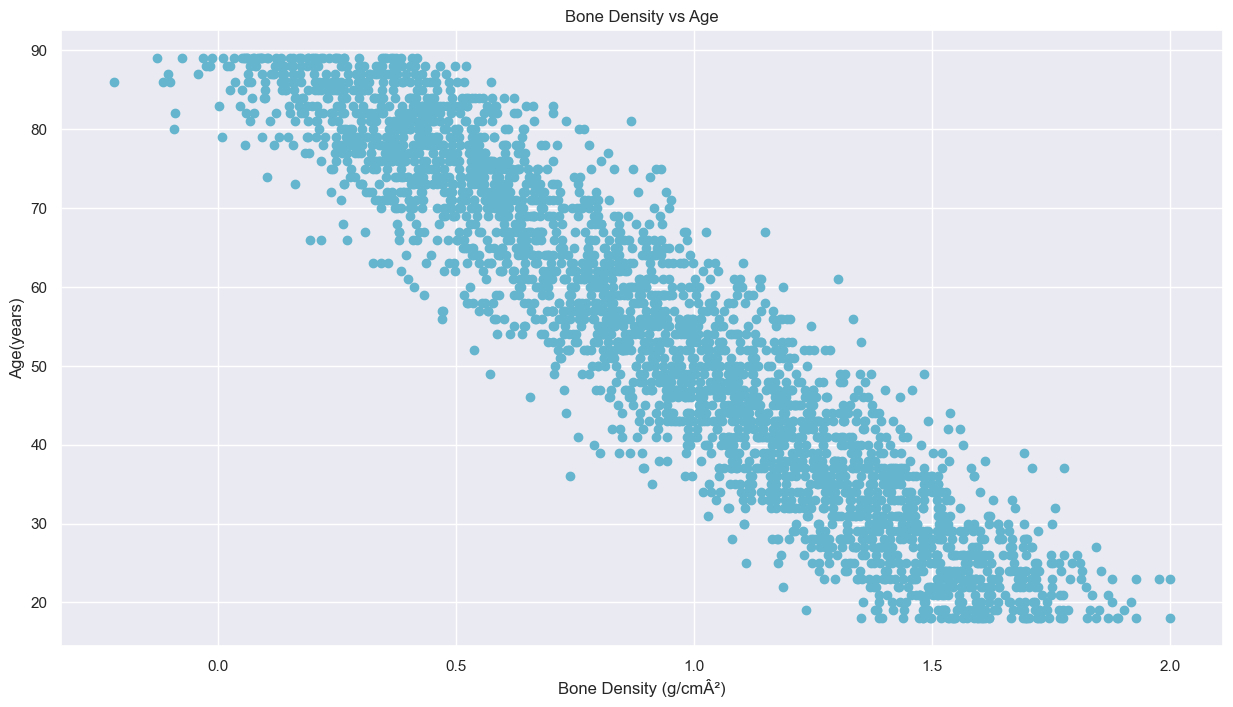

In [26]:
#scatterplot for bone dentsity
plt.scatter(df['Bone Density (g/cmÂ²)'],df['Age'], c = 'c')
plt.title('Bone Density vs Age')
plt.xlabel('Bone Density (g/cmÂ²)')
plt.ylabel('Age(years)')
plt.show()

As an example, here is a scatterplot with bone density on our x-axis, and age on the y-axis. There seems to be a negative association between bone density and age. From our $r^2$ values, we can note a negative association between vision sharpness and age, and a positive association between hearing ability and age. It is important to note that hearing ability is measured in decibels, with lower numbers representing better hearing. The Hearing Health Foundation notes that 0-25 dB is a normal degree of hearing, with 26-55 dB representing a mild to moderate degree of hearing loss. 71-90 dB indicates severe hearing loss, and a person with hearing ability over 91 dB has profound hearing loss.

### Machine Learning

#### Linear Regression

We'll now use a Linear Regression machine learning model, with three variables as features and age as the target. We will use a test-train-split with 20% of the model used for testing.

In [12]:
# selecting features and target variables
features3 = df[['Bone Density (g/cmÂ²)','Vision Sharpness','Hearing Ability (dB)']]
target3 = df['Age']

# test-train-split, create and fit model
x3_train, x3_test, y3_train, y3_test = train_test_split(features3, target3, test_size = 0.2, random_state = 42)
model3 = LinearRegression()
model3.fit(x3_train, y3_train)

# test and training accuracy
print("Training Score:", model3.score(x3_train,y3_train))
print("Validation Score:", model3.score(x3_test,y3_test))

predictions3 = model3.predict(x3_test)
MSE3 = root_mean_squared_error(predictions3, y3_test)**2
print("Mean Squared Error of Model with 3 Variables:", MSE3)

Training Score: 0.9273921868334019
Validation Score: 0.9171096840866003
Mean Squared Error of Model with 3 Variables: 33.96804529876322


Our training score of 0.927 and validation score of 0.917 are both high scores that are close to each other, indicating that this model fits the data well. On the other hand, our mean squared error of 33.968 looks very high. Therefore, we'll take a look at this MSE in the context of the range of our data by comparing this MSE to a baseline MSE.

In [13]:
test_goal = np.mean(df[['Bone Density (g/cmÂ²)','Vision Sharpness','Hearing Ability (dB)']])
baseline = np.full((len(predictions3),), test_goal)
baseline_MSE = root_mean_squared_error(baseline, y3_test)**2
print("Baseline MSE:", baseline_MSE)

Baseline MSE: 1773.5534468289102


In the code block above, we created a naive baseline model, which involved predicting the means of the features in the test set and use it to predict an average age. The MSE for this baseline model is 1773. The MSE for our model, 33.968, is much lower than 1773, indicating that our model performs well.


### Conclusions

Overall, in our project we focused on predicting the age attribute of our data.

For our first target, we used age, where we performed a linear regression model using the top three most correlated features: Bone Density (g/cmÂ²),Vision Sharpness, and Hearing Ability (dB). We found that when we used all these features in congruency for our model, it performed more better than if only using the top two or top one most correlated feature. More significiantly, we found that our model had the best scores(although not much of a change than if using the top 3) when using the top six most correlated features : Bone Density (g/cmÂ²),Vision Sharpness, Hearing Ability (dB), Cognitive Function, Cholesterol Level (mg/dL), and Blood Glucose Level (mg/dL). From these findings, we see that these 6 physical health fractors are what can help us predicts a person's age. As one's bone density density decreases, vision sharpness dereases, hearing ability increases, cognitive function increases, cholesterol level increases, and blood glucose level increases, their age increases. We can see that the older a person gets, their physical health deteoriates where there body isn't able to function as well as it did when they were younger. 

For our second target, we chose Gender, where we performed a kNN classifier model. Using the two most correlated features, gender and weight, we were able to classify gender where our error equated to 0.085. From this, one can see that one's weight and height can help determine one's gender. 


In the future, it would be interesting to explore the other features from our dataset that weren't used in the machine learning models or maybe combine them with the features currently being used. Applying other classification models and comparing it with our kNN classifier model results, would also be another approach in optimizing our model. More specifically, maybe next time, it would be interesting to just focus on the lifestyle factors rather than the physical health factors. 

